# Model for stock prediction

# Tamizhiniyan SR and Adhiraj Bhagawati

In [ ]:
pip install tensorflow==1.14


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from pandas_datareader.data import DataReader
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv("^BSESN.csv")
valid_set_size_percentage = 10 
test_set_size_percentage = 10 
df.dropna(inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-07-01,4263.109863,4301.770020,4247.660156,4300.859863,4300.859863,0.0
1,1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,4333.899902,0.0
2,1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,4323.459961,0.0
3,1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,4323.819824,0.0
4,1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,4291.450195,0.0
...,...,...,...,...,...,...,...
5851,2020-10-05,38956.781250,39263.851563,38819.890625,38973.699219,38973.699219,15500.0
5852,2020-10-06,39336.339844,39623.761719,39191.101563,39574.570313,39574.570313,11300.0
5853,2020-10-07,39633.191406,39968.039063,39450.820313,39878.949219,39878.949219,15000.0
5854,2020-10-08,40204.320313,40468.878906,40062.230469,40182.671875,40182.671875,14400.0


In [ ]:
def normalize_data(df):
    min_max_scaler = MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Close'] = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]
def load_da(stock, seq_len):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1]
    y_train = data[:train_set_size,-1]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1]
    
    x_test = data[train_set_size+valid_set_size:,:-1]
    y_test = data[train_set_size+valid_set_size:,-1]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]


In [ ]:
df.drop(['Volume'],1,inplace=True)
df.drop(['Adj Close'],1,inplace=True)
DATE=df["Date"]
df.drop(['Date'],1,inplace=True)

cols = list(df.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  ['Open', 'High', 'Low', 'Close']
x_train.shape =  (4567, 19, 4)
y_train.shape =  (4567, 4)
x_valid.shape =  (571, 19, 4)
y_valid.shape =  (571, 4)
x_test.shape =  (571, 19, 4)
y_test.shape =  (571, 4)


In [ ]:
dx_train, dy_train, dx_valid, dy_valid, dx_test, dy_test = load_da(DATE, seq_len)


In [ ]:
 dx_test

array([['2018-05-14', '2018-05-15', '2018-05-16', ..., '2018-06-05',
        '2018-06-06', '2018-06-07'],
       ['2018-05-15', '2018-05-16', '2018-05-17', ..., '2018-06-06',
        '2018-06-07', '2018-06-08'],
       ['2018-05-16', '2018-05-17', '2018-05-18', ..., '2018-06-07',
        '2018-06-08', '2018-06-11'],
       ...,
       ['2020-09-08', '2020-09-09', '2020-09-10', ..., '2020-09-30',
        '2020-10-01', '2020-10-05'],
       ['2020-09-09', '2020-09-10', '2020-09-11', ..., '2020-10-01',
        '2020-10-05', '2020-10-06'],
       ['2020-09-10', '2020-09-11', '2020-09-14', ..., '2020-10-05',
        '2020-10-06', '2020-10-07']], dtype=object)

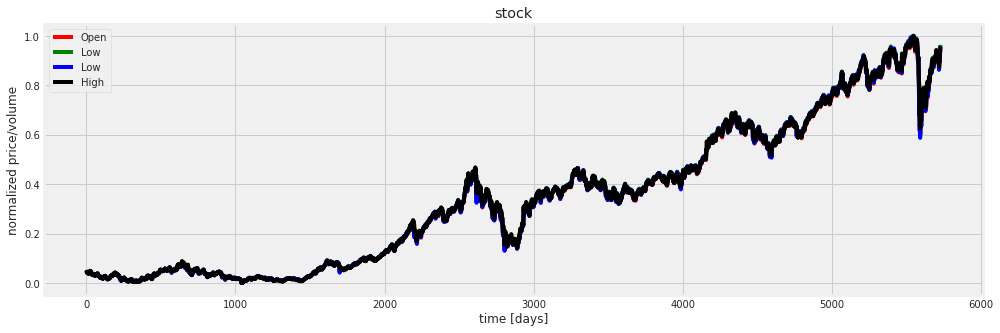

In [ ]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.Open.values, color='red', label='Open')
plt.plot(df_stock_norm.Close.values, color='green', label='Low')
plt.plot(df_stock_norm.Low.values, color='blue', label='Low')
plt.plot(df_stock_norm.High.values, color='black', label='High')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

In [ ]:
import tensorflow as tf
index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]
n_steps = seq_len-1 
n_inputs = 4 
n_neurons = 200 
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]

# use Basic LSTM Cell 
#layers = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu)
#          for layer in range(n_layers)]

# use LSTM Cell with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

# use GRU cell
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
                                              
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})
    

0.00 epochs: MSE train/valid = 0.049555/0.269801
4.99 epochs: MSE train/valid = 0.000045/0.000227
9.98 epochs: MSE train/valid = 0.000042/0.000193
14.98 epochs: MSE train/valid = 0.000032/0.000099
19.97 epochs: MSE train/valid = 0.000025/0.000087
24.96 epochs: MSE train/valid = 0.000041/0.000071
29.95 epochs: MSE train/valid = 0.000026/0.000089
34.95 epochs: MSE train/valid = 0.000019/0.000069
39.94 epochs: MSE train/valid = 0.000020/0.000029
44.93 epochs: MSE train/valid = 0.000034/0.000069
49.92 epochs: MSE train/valid = 0.000015/0.000025
54.92 epochs: MSE train/valid = 0.000027/0.000062
59.91 epochs: MSE train/valid = 0.000018/0.000058
64.90 epochs: MSE train/valid = 0.000016/0.000036
69.89 epochs: MSE train/valid = 0.000019/0.000026
74.89 epochs: MSE train/valid = 0.000017/0.000063
79.88 epochs: MSE train/valid = 0.000033/0.000091
84.87 epochs: MSE train/valid = 0.000018/0.000027
89.86 epochs: MSE train/valid = 0.000025/0.000041
94.85 epochs: MSE train/valid = 0.000017/0.000063
99.

In [ ]:
y_train.shape


(4567, 4)

correct sign prediction for close - open price for train/valid/test: 0.74/0.78/0.83


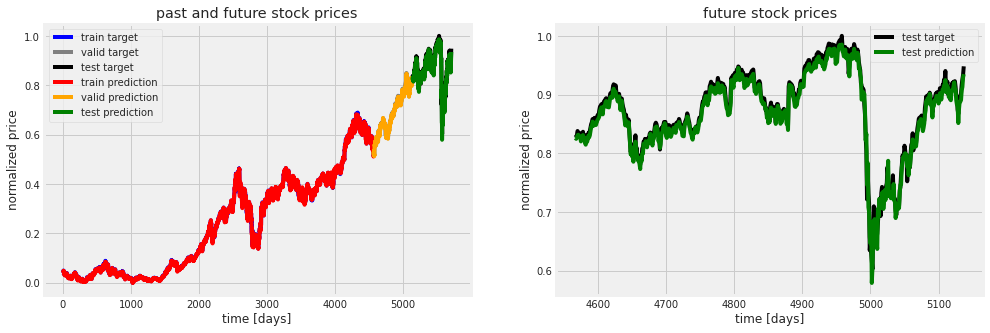

In [ ]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))

In [ ]:
dx_test.shape,y_test_pred.shape

((571, 19), (571, 4))

In [ ]:
dx_test

array([['2018-05-14', '2018-05-15', '2018-05-16', ..., '2018-06-05',
        '2018-06-06', '2018-06-07'],
       ['2018-05-15', '2018-05-16', '2018-05-17', ..., '2018-06-06',
        '2018-06-07', '2018-06-08'],
       ['2018-05-16', '2018-05-17', '2018-05-18', ..., '2018-06-07',
        '2018-06-08', '2018-06-11'],
       ...,
       ['2020-09-08', '2020-09-09', '2020-09-10', ..., '2020-09-30',
        '2020-10-01', '2020-10-05'],
       ['2020-09-09', '2020-09-10', '2020-09-11', ..., '2020-10-01',
        '2020-10-05', '2020-10-06'],
       ['2020-09-10', '2020-09-11', '2020-09-14', ..., '2020-10-05',
        '2020-10-06', '2020-10-07']], dtype=object)